In [ ]:
import os
import cv2
import random
import numpy as np

In [ ]:
categories = ['mask','nomask']

In [ ]:
data = []

for category in categories:
  label = categories.index(category)

  for file in os.listdir(category):
    img_path = os.path.join(category, file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224,224))
    data.append([img, label])

In [ ]:
len(data)

1004

In [ ]:
random.shuffle(data) 

In [ ]:
X = []
y = []

for features, label in data:
  X.append(features)
  y.append(label)

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X = X/255

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X_train, X_test, Y_tarin, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
mobile_net = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Freeze the base model layers
mobile_net.trainable = False

In [ ]:
x = GlobalAveragePooling2D()(mobile_net.output)
x = Dense(1, activation='sigmoid')(x)

In [ ]:
# Create a new model with your layers on top of the base model
model = Model(inputs=mobile_net.input, outputs=x)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
# Compile the model with appropriate loss function, optimizer, and metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
history = model.fit(X_train, Y_tarin, validation_data=(X_test, Y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
26/26 [==============================] - 13s 125ms/step - loss: 0.4682 - accuracy: 0.7933 - val_loss: 0.2083 - val_accuracy: 0.9652
Epoch 2/3500
26/26 [==============================] - 1s 54ms/step - loss: 0.1623 - accuracy: 0.9689 - val_loss: 0.1176 - val_accuracy: 0.9701
Epoch 3/3500
26/26 [==============================] - 1s 55ms/step - loss: 0.1065 - accuracy: 0.9763 - val_loss: 0.0932 - val_accuracy: 0.9701
Epoch 4/3500
26/26 [==============================] - 1s 56ms/step - loss: 0.0849 - accuracy: 0.9826 - val_loss: 0.0800 - val_accuracy: 0.9701
Epoch 5/3500
26/26 [==============================] - 1s 57ms/step - loss: 0.0729 - accuracy: 0.9863 - val_loss: 0.0688 - val_accuracy: 0.9751
Epoch 6/3500
26/26 [==============================] - 1s 56ms/step - loss: 0.0598 - accuracy: 0.9875 - val_loss: 0.0642 - val_accuracy: 0.9751
Epoch 7/3500
26/26 [==============================] - 1s 56ms/step - loss: 0.0533 - accuracy: 0.9875 - val_loss: 0.0593 - val_accuracy: 0.97

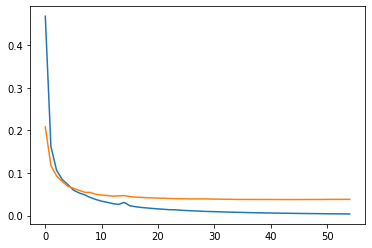

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

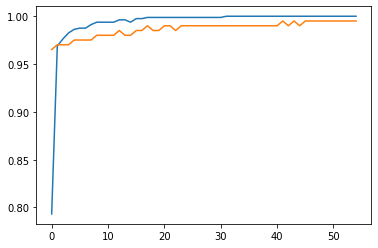

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
# Save the model to a file
model.save('my_model.h5')